# 5: Time Series

The hand-in exercise for this topic is Task 3,4 and 6 from the notebook “TSA_Task”. This
means that you have to do the cleaning of dataset, then create features (at least 5 new
features should be created, and you should be able to justify why you created each of
the features). And then, you should train an XGBoost model on the dataset. Note that
you also need to do relevant train, test, validation split and be able to explain why you
chose a certain split. Lastly, you should calculate evaluation metrics: rmse and mae to
show performance of your model. The hyperparameter tuning part is not required.

---

### Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Get the dataset w kaggleHub

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\abjar\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [3]:
dataset_path = path

files = os.listdir(dataset_path)
print(files)

['day.csv', 'hour.csv', 'Readme.txt']


In [4]:
file_path = path + "/hour.csv"

df = pd.read_csv(file_path)

---

### Task 3 from TSA_task:

* Clean and pre-process the dataset as required and prepare the data for modelling.

First look EDA:

Using .head(), .info() and .describe() function to get a initial understanding of the data we are handling.
Also checking if we need to adress any missing values or other inconsistencies.

In [5]:
# Look at first 10 records in the data frane
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


No missing values in this data, so no need to do cleaning/transformation for now

In [7]:
# Use this to ensure there are no absurd outliers before beginning analysis
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There seem to be no extreme outliers in this data, so we proceed to analysis.

---

### Task 4 from TSA_task:

* Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling

A 'lag' is a when a data record is shifted to a previous time step, it makes it possible to describe the history of records in the data, enabling time based analysis. Lets add the lag features of 1 day, 1 week and 1 month to the dataframe.

In [8]:
# Lag features for the 'cnt' feature
df['cnt_lag_1d'] = df['cnt'].shift(24)  # 1 day)
df['cnt_lag_1w'] = df['cnt'].shift(24 * 7)  # 1 week
df['cnt_lag_1m'] = df['cnt'].shift(24 * 30)  # 1 month

In [9]:
# Rolling window features for 'cnt'
df['roll_mean_3h']  = df['cnt'].rolling(window=3).mean()    # Last 3 hours rolling mean
df['roll_mean_3d']  = df['cnt'].rolling(window=72).mean()     # Last 3 days rolling mean (72 hours)

Lets take a look at our new features to see if they seem useful

In [10]:
# Using data sample instead of data head here, as first few values will always be NaN since there are no previous data to calculate result from
df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,cnt_lag_1d,cnt_lag_1w,cnt_lag_1m,roll_mean_3h,roll_mean_3d
1157,1158,2011-02-21,1,0,2,0,1,1,0,2,...,0.42,0.3284,7,30,37,29.0,51.0,35.0,46.000000,89.041667
6019,6020,2011-09-13,3,0,9,9,0,2,1,1,...,0.69,0.0896,35,179,214,176.0,172.0,269.0,333.666667,219.513889
5039,5040,2011-08-02,3,0,8,21,0,2,1,1,...,0.52,0.2239,53,201,254,220.0,267.0,167.0,332.000000,187.166667
370,371,2011-01-16,1,0,1,22,0,0,0,2,...,0.49,0.1343,2,19,21,26.0,62.0,NaN,35.333333,54.166667
12092,12093,2012-05-24,2,1,5,1,0,4,1,1,...,0.88,0.0896,9,21,30,32.0,28.0,7.0,64.000000,218.375000
12140,12141,2012-05-26,2,1,5,1,0,6,0,1,...,0.83,0.1343,18,64,82,42.0,104.0,23.0,121.333333,262.263889
2990,2991,2011-05-09,2,0,5,12,0,1,1,1,...,0.43,0.1940,35,160,195,382.0,187.0,142.0,146.333333,187.361111
5566,5567,2011-08-24,3,0,8,20,0,3,1,1,...,0.58,0.2985,45,289,334,260.0,280.0,302.0,465.000000,217.166667
1317,1318,2011-02-28,1,0,2,3,0,1,1,3,...,0.93,0.1642,0,1,1,37.0,147.0,2.0,13.000000,81.416667
3201,3202,2011-05-18,2,0,5,7,0,3,1,1,...,0.88,0.1940,14,260,274,151.0,318.0,168.0,128.000000,178.013889


Makes it very convenient to analyse variables like sales or rentals overtime

---

### Task 6 from TSA_task:

* Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

To accomplish this task and train a XGBoost model, we must first make sure the data includes the following:

* Convert dteday to datetime format
* Create features 'hour', 'day', 'weekday', 'month' and 'year'
* Make a train/test split on the data

In [11]:
# Convert 'date' to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])
# Create time-based features
df['day'] = df['dteday'].dt.day
df['year'] = df['dteday'].dt.year
df['weekday'] = df['dteday'].dt.weekday  # 0 = Monday, 6 = Sunday
# Take a look at the dataframe after adding in the above
df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,cnt_lag_1d,cnt_lag_1w,cnt_lag_1m,roll_mean_3h,roll_mean_3d,day,year
5307,5308,2011-08-14,3,0,8,1,0,6,0,3,...,16,57,73,77.0,73.0,20.0,94.333333,193.583333,14,2011
10357,10358,2012-03-12,1,1,3,16,0,0,1,1,...,77,255,332,509.0,130.0,221.0,262.000000,193.805556,12,2012
7410,7411,2011-11-10,4,0,11,9,0,3,1,2,...,23,188,211,219.0,164.0,406.0,306.333333,172.291667,10,2011
3253,3254,2011-05-20,2,0,5,11,0,4,1,2,...,63,133,196,164.0,146.0,118.0,192.666667,182.402778,20,2011
7860,7861,2011-11-29,4,0,11,4,0,1,1,2,...,1,5,6,4.0,3.0,33.0,4.333333,138.083333,29,2011
6311,6312,2011-09-25,4,0,9,13,0,6,0,2,...,122,247,369,460.0,376.0,187.0,381.000000,180.694444,25,2011
12848,12849,2012-06-24,3,1,6,13,0,6,0,1,...,237,348,585,564.0,614.0,333.0,549.000000,276.583333,24,2012
16999,17000,2012-12-16,4,1,12,2,0,6,0,2,...,8,79,87,69.0,78.0,21.0,97.666667,228.055556,16,2012
3061,3062,2011-05-12,2,0,5,11,0,3,1,1,...,43,136,179,141.0,148.0,49.0,179.333333,188.625000,12,2011
6258,6259,2011-09-23,4,0,9,8,0,4,1,3,...,20,297,317,415.0,409.0,444.0,225.000000,178.916667,23,2011


Few preprocessing steps before training the XGBoost model

In [12]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16659 entries, 720 to 17378
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       16659 non-null  int64         
 1   dteday        16659 non-null  datetime64[ns]
 2   season        16659 non-null  int64         
 3   yr            16659 non-null  int64         
 4   mnth          16659 non-null  int64         
 5   hr            16659 non-null  int64         
 6   holiday       16659 non-null  int64         
 7   weekday       16659 non-null  int32         
 8   workingday    16659 non-null  int64         
 9   weathersit    16659 non-null  int64         
 10  temp          16659 non-null  float64       
 11  atemp         16659 non-null  float64       
 12  hum           16659 non-null  float64       
 13  windspeed     16659 non-null  float64       
 14  casual        16659 non-null  int64         
 15  registered    16659 non-null  int64    

Implement the model:

In [13]:
# For an hourly dataset, 7 days = 168 hours.
train = df.iloc[:-168].copy()   # Training set: all data except the last week
test = df.iloc[-168:].copy()      # Test set: the last week of data

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (16491, 24)
Test shape: (168, 24)


Testing the lag length, it should be 7 days, so the span from 24th -> 31st seems correct

In [14]:
print("Test period from", test['dteday'].min(), "to", test['dteday'].max())

Test period from 2012-12-24 00:00:00 to 2012-12-31 00:00:00


In [15]:
# Define the features for XGBoost; adjust based on your earlier feature engineering.
FEATURES_XGB = [
    'hr', 'weekday', 'mnth', 'yr',  # basic time features
    'cnt_lag_1d', 'cnt_lag_1w', 'cnt_lag_1m',     # lag features: 1 day, 1 week, 1 month lags
    'roll_mean_3h', 'roll_mean_3d'     # rolling means: last 3 hours, last 3 days
]
TARGET = 'cnt'

# Create training and test feature matrices and target vectors
X_train_xgb = train[FEATURES_XGB].copy()
y_train_xgb = train[TARGET].copy()
X_test_xgb = test[FEATURES_XGB].copy()
y_test_xgb = test[TARGET].copy()

# If any non-numeric column (e.g., 'dteday') exists in X, drop it.
for col in ['dteday']:
    if col in X_train_xgb.columns:
        X_train_xgb = X_train_xgb.drop(columns=[col])
    if col in X_test_xgb.columns:
        X_test_xgb = X_test_xgb.drop(columns=[col])

print("Features used:", FEATURES_XGB)
print(X_train_xgb.head())

Features used: ['hr', 'weekday', 'mnth', 'yr', 'cnt_lag_1d', 'cnt_lag_1w', 'cnt_lag_1m', 'roll_mean_3h', 'roll_mean_3d']
     hr  weekday  mnth  yr  cnt_lag_1d  cnt_lag_1w  cnt_lag_1m  roll_mean_3h  \
720   9        2     2   0       116.0         9.0        16.0    109.000000   
721  10        2     2   0        47.0        36.0        40.0    113.000000   
722  11        2     2   0        51.0       108.0        32.0     78.666667   
723  12        2     2   0        55.0       238.0        13.0     59.000000   
724  13        2     2   0        52.0       144.0         1.0     63.666667   

     roll_mean_3d  
720     58.555556  
721     58.875000  
722     58.708333  
723     58.777778  
724     58.472222  


### Take aways

* The model gives information about bike rental trends over specified time rolls

In [16]:
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',             # Use RMSE for evaluation
    'max_depth': 3,                    # Maximum depth of trees
    'learning_rate': 0.01,             # Learning rate
    'colsample_bytree': 0.8,           # Subsample of features
    'subsample': 0.8,                  # Subsample ratio of observations
    'seed': 42
}

watchlist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 4000
early_stopping_rounds = 50

# Train the XGBoost model with early stopping
model = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=100)

print("Best iteration:", model.best_iteration)

[0]	train-rmse:181.84841	eval-rmse:141.02345
[100]	train-rmse:93.19560	eval-rmse:69.66656


c:\Users\abjar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[200]	train-rmse:63.94268	eval-rmse:46.20858
[300]	train-rmse:54.43025	eval-rmse:37.94725
[400]	train-rmse:50.33304	eval-rmse:34.83355
[500]	train-rmse:47.50929	eval-rmse:32.49857
[600]	train-rmse:45.35715	eval-rmse:30.77339
[700]	train-rmse:43.63666	eval-rmse:29.08716
[800]	train-rmse:42.27299	eval-rmse:28.31922
[900]	train-rmse:41.14229	eval-rmse:27.59785
[1000]	train-rmse:40.17101	eval-rmse:27.14876
[1100]	train-rmse:39.11173	eval-rmse:26.69596
[1200]	train-rmse:38.28869	eval-rmse:26.41518
[1300]	train-rmse:37.41856	eval-rmse:26.22943
[1400]	train-rmse:36.68188	eval-rmse:26.08144
[1416]	train-rmse:36.53311	eval-rmse:26.11417
Best iteration: 1367


Trying out the best amount of iterations

Lets try amd visualize the Actual vs Predicted bike rentals:

XGBoost - Test RMSE: 26.111354933157195
XGBoost - Test MAE: 18.6739559173584


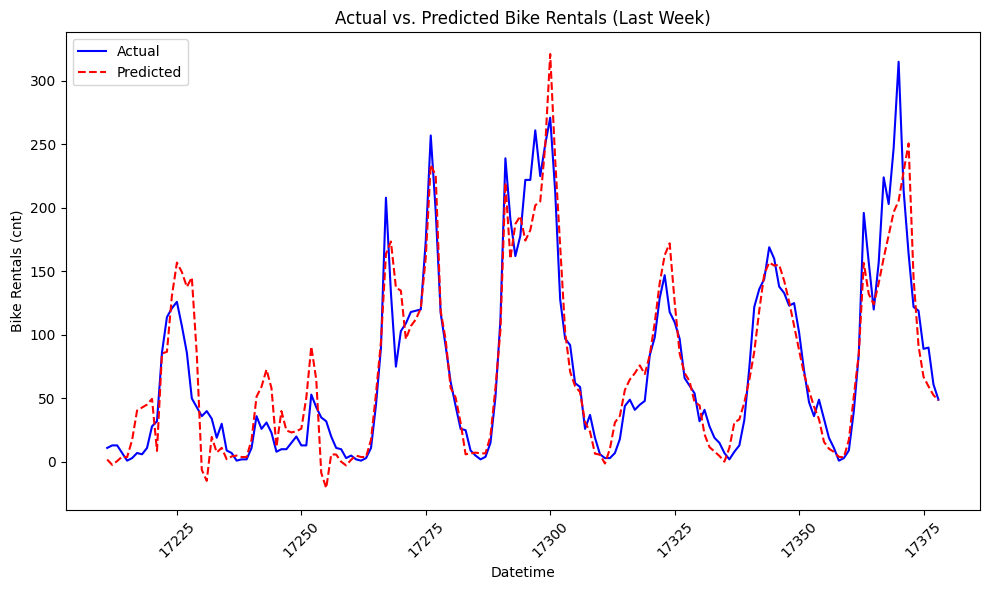

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred_xgb = model.predict(dtest)

# Calculate RMSE and MAE
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

print("XGBoost - Test RMSE:", rmse_xgb)
print("XGBoost - Test MAE:", mae_xgb)

# Plot actual vs. predicted counts for the last week
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test_xgb, label='Actual', color='blue')
plt.plot(test.index, y_pred_xgb, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs. Predicted Bike Rentals (Last Week)')
plt.xlabel('Datetime')
plt.ylabel('Bike Rentals (cnt)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
r2 = r2_score(y_test_xgb, y_pred_xgb)

print("test r2: ", r2)

test r2:  0.8702120780944824


looking at both the rmse, r2 and the graph above its safe to say that the predictive model is accurate at predicting bike rentals, it can predict around 87% of variance in bike sales, which is fairly high